# 문제정의

- 버섯의 특성 데이터를 이용해서 독버섯인지 식용버섯인지 분류하는 모델을 만들자
- 의사결정트리를 시각화 해보자

- 라벨인코딩, 원핫인코딩


# 데이터 수집

In [1]:
import pandas as pd

mushroom=pd.read_csv("./data/mushroom.csv")
mushroom.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 탐색적 데이터 분석


In [2]:
# 데이터의 형태
mushroom.shape

(8124, 23)

In [3]:
# 결측치 확인 
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
#결측치는 없다
#모든 데이터가 범주형 데이터로 존재

In [5]:
# 특성데이터와 라벨데이터로 분리
X= mushroom.loc[:,"cap-shape":]

y=mushroom.loc[:, "poisonous"]

X.shape , y.shape

((8124, 22), (8124,))

In [6]:
#라벨 데이터의 클래스 확인
y.unique()

array(['p', 'e'], dtype=object)

In [7]:
#라벨 데이터의 클래스의 데이터 수
y.value_counts()


e    4208
p    3916
Name: poisonous, dtype: int64

In [8]:
#barplot()

import seaborn as sb


<AxesSubplot:xlabel='cap-shape', ylabel='count'>

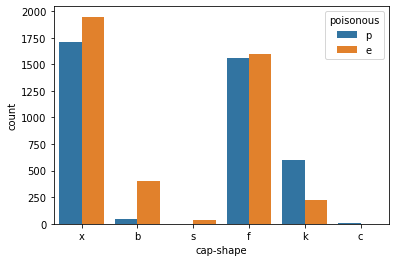

In [11]:
sb.countplot(data=mushroom, x="cap-shape", hue=y)

# 데이터 전처리

- 인코딩(encoding) :범주형 데이터를 수치형 데이터로 변환하는 것
    - 계산하기 위해
    - 라벨(label) 인코딩: 범주형 데이터를 정수로 변환
        - 크기특성이 없는 데이터에 크기를 갖는 숫자를 부여하는 문제 
        
    - one hot encoding: 범주형을 이진수로 변환 
        - 크기 특성이 없는 데이터에 크기가 없는 숫자를 부여할 수 있음 
        - 특성을 늘려주는 효과가 있음
        
- one hot encoding 방법
    - 과목: 국어, 수학, 과학 -> 국어 (001), 수학(010), 과학(100)
    - 해당 값인 경우에만 1이고 그렇지 않으면 0인 컬럼을 생성